<a href="https://colab.research.google.com/github/gomlfx/apiaryfund/blob/master/fbprophet_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from fbprophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [5]:
#for the high prediction
df = pd.read_csv('EURUSD_Daily_197101040000_202009180000.csv', sep='\t')
pd_df2 = pd.DataFrame(data = df.tail(1000))
pd_df2.rename(columns={"<DATE>":"ds","<HIGH>":"y"}, inplace=True)
df = pd_df2
df['ds'] = pd.to_datetime(df['ds'])
m = Prophet().fit(df)
future = m.make_future_dataframe(periods=1, freq='D')
#making sure to drop weekends before running into m.predict
future = future[future['ds'].dt.dayofweek < 5]
fcst_h = m.predict(future)
fcst_h[['ds','yhat']].tail(1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
999,2020-09-18,1.194038


In [6]:
#for the close prediction
#m = Prophet(daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True).fit(df) 
df = pd.read_csv('EURUSD_Daily_197101040000_202009180000.csv', sep='\t')
pd_df2 = pd.DataFrame(data = df.tail(1000))
pd_df2.rename(columns={"<DATE>":"ds","<CLOSE>":"y"}, inplace=True)
df = pd_df2
m = Prophet().fit(df)
future = m.make_future_dataframe(periods=1, freq='D')
#making sure to drop weekends before running into m.predict
future = future[future['ds'].dt.dayofweek < 5]
fcst_c = m.predict(future)
fcst_c[['ds','yhat']].tail(1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
999,2020-09-18,1.188846


In [7]:
#for the low prediction
df = pd.read_csv('EURUSD_Daily_197101040000_202009180000.csv', sep='\t')
pd_df2 = pd.DataFrame(data = df.tail(1000))
pd_df2.rename(columns={"<DATE>":"ds","<LOW>":"y"}, inplace=True)
df = pd_df2
df['ds'] = pd.to_datetime(df['ds'])
m = Prophet().fit(df)
future = m.make_future_dataframe(periods=1, freq='D')
#making sure to drop weekends before running into m.predict
future = future[future['ds'].dt.dayofweek < 5]
fcst_l = m.predict(future)
fcst_l[['ds','yhat']].tail(1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
999,2020-09-18,1.184747


(1.17, 1.22)

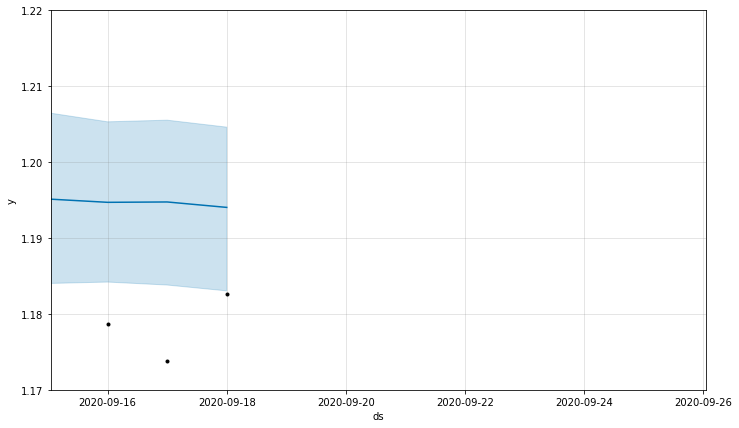

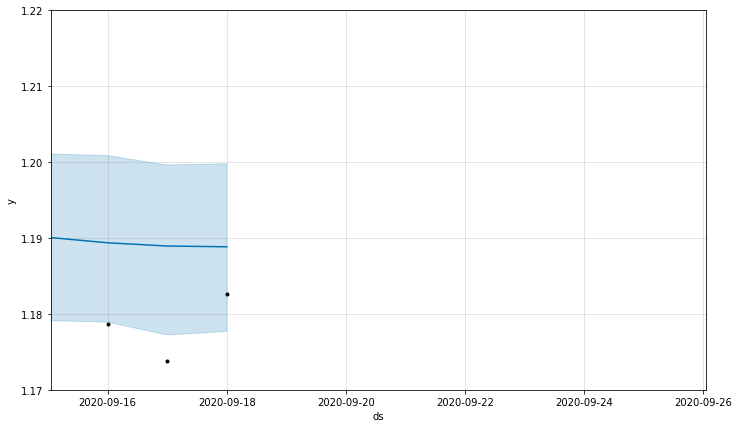

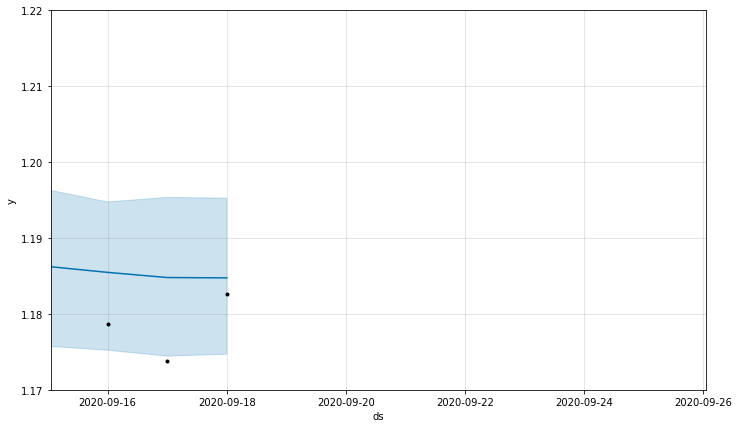

In [8]:
#combine on a single chart
pd.plotting.register_matplotlib_converters()
%matplotlib inline
fig = m.plot(fcst_h)
plt.xlim('2020-09-15 01:00:00','2020-09-26 01:00:00')
plt.ylim(1.17,1.22)

fig = m.plot(fcst_c)
plt.xlim('2020-09-15 01:00:00','2020-09-26 01:00:00')
plt.ylim(1.17,1.22)

fig = m.plot(fcst_l)
plt.xlim('2020-09-15 01:00:00','2020-09-26 01:00:00')
plt.ylim(1.17,1.22)
# fcst_h
# fcst_c
# fcst_l
